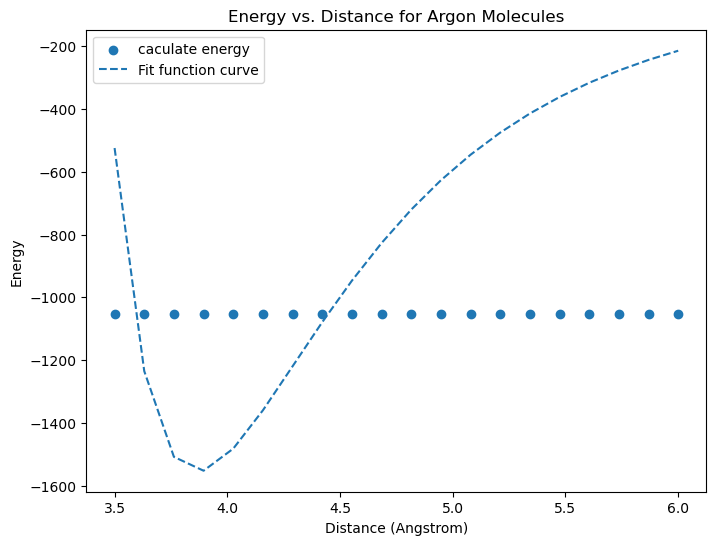

In [21]:
import psi4
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 计算 Lennard-Jones 势能
def lj(r, sigma, eps):
    return 4 * eps * ((sigma / r) ** 12 - (sigma / r) ** 6)

# 创建 Psi4 计算函数
def compute_energy(distance):
    # 设置计算参数
    psi4.core.clean()
    psi4.core.set_output_file('psi4_output.dat', False)
    psi4.set_memory('2 GB')

    # 定义氩分子
    ar = psi4.geometry(f"""
    0 1
    Ar
    --
    Ar 1 {distance}
    units angstrom
    """)

    # 运行能量计算
    energy = psi4.energy('scf/cc-pvdz', molecule=ar)
    return energy

# 定义距离范围
distances = np.linspace(3.5, 6.0, 20)

# 计算各距离下的能量
energies = [compute_energy(dist) for dist in distances]

# 初始猜测 Lennard-Jones 参数值
initial_guess = [3.4, 0.010]

# 使用 curve_fit 拟合能量与距离的关系
popt, pcov = curve_fit(lj, distances, energies, p0=initial_guess)

# 提取拟合参数
sigma_fit, eps_fit = popt

# 绘制能量与距离的关系图
plt.figure(figsize=(8, 6))
plt.scatter(distances, energies, label='caculate energy')  # 绘制计算值
plt.plot(distances, lj(distances, sigma_fit, eps_fit), '--', label='Fit function curve')  # 绘制拟合曲线
plt.xlabel('Distance (Angstrom)')
plt.ylabel('Energy')
plt.title('Energy vs. Distance for Argon Molecules')
plt.legend()

# 保存图形到图形目录
plt.savefig('Figures/argon_energy_curve.png')

# 显示图形
plt.show()
